In [1]:
from google.colab import drive
drive.mount('/drive')

#Optional: move to the desired location:
%cd /drive/My Drive/600  

Mounted at /drive
/drive/My Drive/600


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pandas as pd 
from imutils import paths

import imutils
from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

In [3]:
def get_denoising(image):
    

    resizing = cv2.resize(image, (224, 224)) 
    gray = cv2.cvtColor(resizing, cv2.COLOR_BGR2GRAY)

    gauss =gray.astype("float32")

    filtered_img = wiener(gauss, (5, 5))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)




    
    kernel = np.ones((5, 5), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)

    # ret,thresh = cv2.threshold(filtered_img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # img = cv2.inpaint(gray,thresh,1,cv2.INPAINT_TELEA)
    
    return  img
    

    
    

In [4]:
imagePaths = list(paths.list_images('/drive/My Drive/Data_Baru10'))

In [5]:
# data = pd.DataFrame(columns=['contrast','correlation', 'energy', 'homogeneity'])
# labels = pd.DataFrame(columns=['label'])
data =[]
labels =[]


In [6]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    
    features = get_denoising(image)
    
    # gray = cv2.cvtColor(features, cv2.COLOR_BGR2GRAY)
    

    data.append(features)

        
    label = imagePath.split(os.path.sep)[-2]

    labels.append(label)




    if  i > 0 and i % 1 == 0:

        print("{}/{}".format(i, len(imagePaths)))
        
        
        

1/225
2/225
3/225
4/225
5/225
6/225
7/225
8/225
9/225
10/225
11/225
12/225
13/225
14/225
15/225
16/225
17/225
18/225
19/225
20/225
21/225
22/225
23/225
24/225
25/225
26/225
27/225
28/225
29/225
30/225
31/225
32/225
33/225
34/225
35/225
36/225
37/225
38/225
39/225
40/225
41/225
42/225
43/225
44/225
45/225
46/225
47/225
48/225
49/225
50/225
51/225
52/225
53/225
54/225
55/225
56/225
57/225
58/225
59/225
60/225
61/225
62/225
63/225
64/225
65/225
66/225
67/225
68/225
69/225
70/225
71/225
72/225
73/225
74/225
75/225
76/225
77/225
78/225
79/225
80/225
81/225
82/225
83/225
84/225
85/225
86/225
87/225
88/225
89/225
90/225
91/225
92/225
93/225
94/225
95/225
96/225
97/225
98/225
99/225
100/225
101/225
102/225
103/225
104/225
105/225
106/225
107/225
108/225
109/225
110/225
111/225
112/225
113/225
114/225
115/225
116/225
117/225
118/225
119/225
120/225
121/225
122/225
123/225
124/225
125/225
126/225
127/225
128/225
129/225
130/225
131/225
132/225
133/225
134/225
135/225
136/225
137/225
138/225
139/

In [7]:

from skimage.feature import greycomatrix, greycoprops


# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[4], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = [ 'contrast', 'correlation', 'energy','homogeneity']
# ,'ASM', 'dissimilarity'


glcm_all_agls = []
for img, label in zip(data, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [8]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
# glcm_df = pd.DataFrame(data)

glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("/drive/My Drive/TA/glcm/glcm4_Wiener_DNN.csv", index=False)

glcm_df.head(1000)

contrast_0  contrast_45  ...  homogeneity_135     label
0    232.621388   235.339141  ...         0.129253  Melanoma
1    419.025812   569.116623  ...         0.186108  Melanoma
2    135.149878   141.098954  ...         0.135627  Melanoma
3    212.225467   236.416433  ...         0.120939  Melanoma
4     41.480722    47.047460  ...         0.193122  Melanoma
..          ...          ...  ...              ...       ...
220   69.021449    69.072521  ...         0.168314    Normal
221   49.450731    48.168096  ...         0.176252    Normal
222   70.457691    73.536578  ...         0.176455    Normal
223   25.009416    24.968346  ...         0.230520    Normal
224   39.118486    40.733912  ...         0.181521    Normal

[225 rows x 17 columns]

In [9]:
print(glcm_df)

     contrast_0  contrast_45  ...  homogeneity_135     label
0    232.621388   235.339141  ...         0.129253  Melanoma
1    419.025812   569.116623  ...         0.186108  Melanoma
2    135.149878   141.098954  ...         0.135627  Melanoma
3    212.225467   236.416433  ...         0.120939  Melanoma
4     41.480722    47.047460  ...         0.193122  Melanoma
..          ...          ...  ...              ...       ...
220   69.021449    69.072521  ...         0.168314    Normal
221   49.450731    48.168096  ...         0.176252    Normal
222   70.457691    73.536578  ...         0.176455    Normal
223   25.009416    24.968346  ...         0.230520    Normal
224   39.118486    40.733912  ...         0.181521    Normal

[225 rows x 17 columns]


In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

glcm_df = pd.read_csv("/drive/My Drive/TA/glcm/glcm4_Wiener_DNN.csv")

glcm_df.head(120)

contrast_0  contrast_45  ...  homogeneity_135     label
0    232.621388   235.339141  ...         0.129253  Melanoma
1    419.025812   569.116623  ...         0.186108  Melanoma
2    135.149878   141.098954  ...         0.135627  Melanoma
3    212.225467   236.416433  ...         0.120939  Melanoma
4     41.480722    47.047460  ...         0.193122  Melanoma
..          ...          ...  ...              ...       ...
115  127.220921   143.980262  ...         0.184162       Bcc
116   31.603206    32.681825  ...         0.294081       Bcc
117  186.663291   204.563502  ...         0.149494       Bcc
118  406.828774   438.558404  ...         0.094006       Bcc
119   35.238190    43.611781  ...         0.264817       Bcc

[120 rows x 17 columns]

In [11]:
# glcm_df.drop('Unnamed: 0', axis=1)

In [12]:
print(glcm_df)

     contrast_0  contrast_45  ...  homogeneity_135     label
0    232.621388   235.339141  ...         0.129253  Melanoma
1    419.025812   569.116623  ...         0.186108  Melanoma
2    135.149878   141.098954  ...         0.135627  Melanoma
3    212.225467   236.416433  ...         0.120939  Melanoma
4     41.480722    47.047460  ...         0.193122  Melanoma
..          ...          ...  ...              ...       ...
220   69.021449    69.072521  ...         0.168314    Normal
221   49.450731    48.168096  ...         0.176252    Normal
222   70.457691    73.536578  ...         0.176455    Normal
223   25.009416    24.968346  ...         0.230520    Normal
224   39.118486    40.733912  ...         0.181521    Normal

[225 rows x 17 columns]


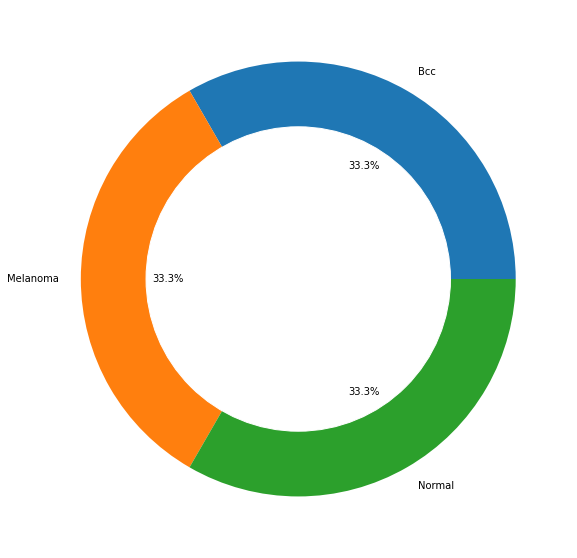

In [13]:
label_distr = glcm_df['label'].value_counts()

label_name = [ 'Bcc','Melanoma', 'Normal']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
print(label_distr)

Normal      75
Bcc         75
Melanoma    75
Name: label, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ------------------------ Data Normalization menggunakan Decimal Scaling --------------------------------
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

# X = decimal_scaling(
#             glcm_df[['contrast', 'correlation', 'energy','homogeneity']].values
#                 )


X = decimal_scaling(
    glcm_df[['contrast_0', 'correlation_0', 'energy_0','homogeneity_0',
              'contrast_45', 'correlation_45', 'energy_45','homogeneity_45',
              'contrast_90', 'correlation_90', 'energy_90','homogeneity_90',
              'contrast_135', 'correlation_135', 'energy_135','homogeneity_135'
            ]].values
            )

#       'ASM_0','ASM_45','ASM_90','ASM_135', 'dissimilarity_0','dissimilarity_45',
#                      'dissimilarity_90','dissimilarity_135'
                    

In [16]:
le = LabelEncoder()
le.fit(glcm_df["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(glcm_df['label'].values)
Y = to_categorical(Y)

print("\n\n one hot encoding for sample 0 : \n", Y[0])

 categorical label : 
 ['Bcc' 'Melanoma' 'Normal']


 one hot encoding for sample 0 : 
 [0. 1. 0.]


# Klasifikasi Sebelum Tuning Parameter

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [18]:
 import numpy as np
 
 def display_summary(true,pred):
     cnf_matrix = confusion_matrix(true,pred)
     fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
     fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
     tp = np.diag(cnf_matrix)
     tn = cnf_matrix.sum() - (fp + fn + tp)
 
     fp = fp.astype(float)
     fn = fn.astype(float)
     tp = tp.astype(float)
     tn = tn.astype(float)
 
     #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
     print('confusion matrix')
     print(np.array([[tp,fp],[fn,tn]]))
     print('sensitivity is %f',1.*tp/(tp+fn))
     print('specificity is %f',1.*tn/(tn+fp))
     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
#      print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))

# import numpy as np

# def display_summary(true,pred):
#     tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
#     print('confusion matrix')
#     print(np.array([[tp,fp],[fn,tn]]))
#     print('sensitivity is %f',1.*tp/(tp+fn))
#     print('specificity is %f',1.*tn/(tn+fp))
#     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
#     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 
# print('Deep Neural Network')
# display_summary(y_test.argmax(axis=1), y_pred.argmax(axis=1))

iterate kfold :  0  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 16) (45, 16)
Epoch 1/100
6/6 [==============================] - 1s 48ms/step - loss: 1.0968 - accuracy: 0.3944 - val_loss: 1.0979 - val_accuracy: 0.4000
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0832 - accuracy: 0.4722 - val_loss: 1.0979 - val_accuracy: 0.2889
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0659 - accuracy: 0.4389 - val_loss: 1.0949 - val_accuracy: 0.3556
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0414 - accuracy: 0.5167 - val_loss: 1.0816 - val_accuracy: 0.3778
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0049 - accuracy: 0.5444 - val_loss: 1.0741 - val_accuracy: 0.4000
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9658 - accuracy: 0.5389 - val_loss: 1.0581 - val_accuracy: 0.4222
Epoch 7/100
6/6 [=============================

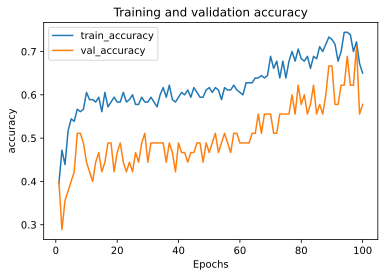

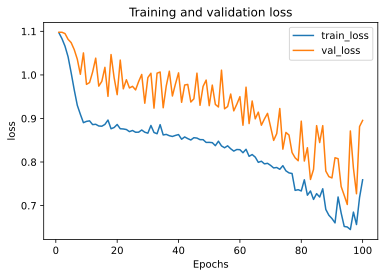

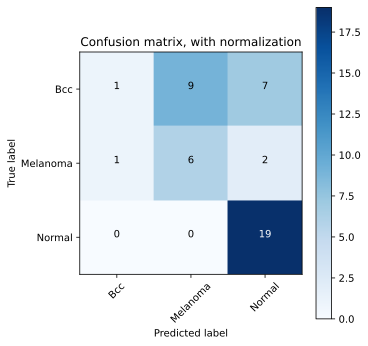

              precision    recall  f1-score   support

         Bcc       0.50      0.06      0.11        17
    Melanoma       0.40      0.67      0.50         9
      Normal       0.68      1.00      0.81        19

    accuracy                           0.58        45
   macro avg       0.53      0.58      0.47        45
weighted avg       0.56      0.58      0.48        45

Deep Neural Network
confusion matrix
[[[ 1.  6. 19.]
  [ 1.  9.  9.]]

 [[16.  3.  0.]
  [27. 27. 17.]]]
sensitivity is %f [0.06 0.67 1.  ]
specificity is %f [0.96 0.75 0.65]
accuracy is %f [0.62 0.73 0.8 ]


iterate kfold :  1  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 16) (45, 16)
Epoch 1/100
6/6 [==============================] - 1s 39ms/step - loss: 1.0946 - accuracy: 0.3833 - val_loss: 1.0948 - val_accuracy: 0.3333
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0799 - accuracy: 0.5611 - val_loss: 1.0865 - val_accuracy: 0.4222
Epoch 3/100


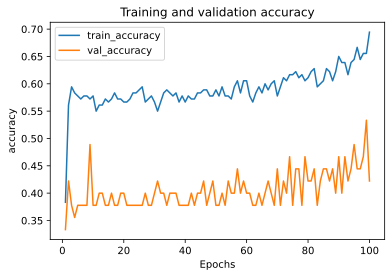

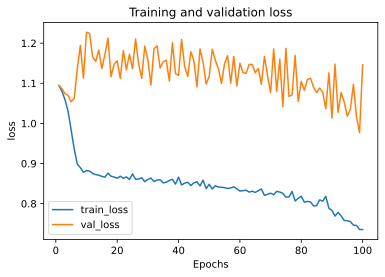

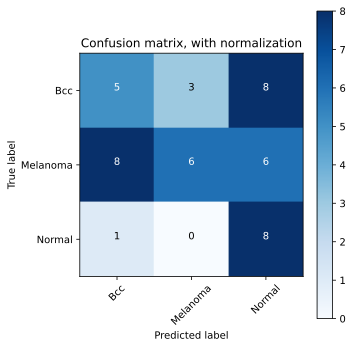

              precision    recall  f1-score   support

         Bcc       0.36      0.31      0.33        16
    Melanoma       0.67      0.30      0.41        20
      Normal       0.36      0.89      0.52         9

    accuracy                           0.42        45
   macro avg       0.46      0.50      0.42        45
weighted avg       0.50      0.42      0.41        45

Deep Neural Network
confusion matrix
[[[ 5.  6.  8.]
  [ 9.  3. 14.]]

 [[11. 14.  1.]
  [20. 22. 22.]]]
sensitivity is %f [0.31 0.3  0.89]
specificity is %f [0.69 0.88 0.61]
accuracy is %f [0.56 0.62 0.67]


iterate kfold :  2  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 16) (45, 16)
Epoch 1/100
6/6 [==============================] - 1s 41ms/step - loss: 1.0925 - accuracy: 0.4389 - val_loss: 1.0836 - val_accuracy: 0.4889
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0759 - accuracy: 0.5167 - val_loss: 1.0651 - val_accuracy: 0.5333
Epoch 3/100


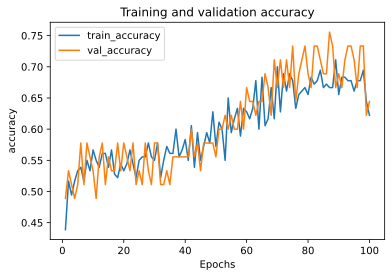

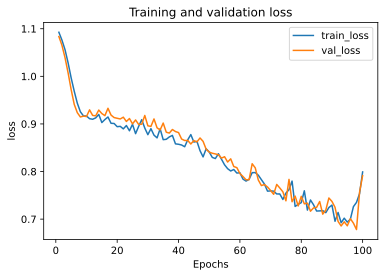

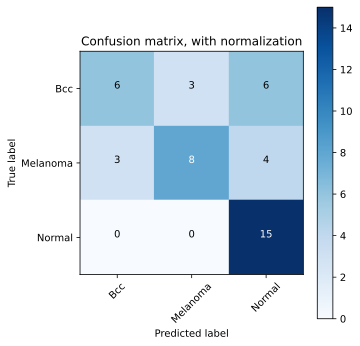

              precision    recall  f1-score   support

         Bcc       0.67      0.40      0.50        15
    Melanoma       0.73      0.53      0.62        15
      Normal       0.60      1.00      0.75        15

    accuracy                           0.64        45
   macro avg       0.66      0.64      0.62        45
weighted avg       0.66      0.64      0.62        45

Deep Neural Network
confusion matrix
[[[ 6.  8. 15.]
  [ 3.  3. 10.]]

 [[ 9.  7.  0.]
  [27. 27. 20.]]]
sensitivity is %f [0.4  0.53 1.  ]
specificity is %f [0.9  0.9  0.67]
accuracy is %f [0.73 0.78 0.78]


iterate kfold :  3  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 16) (45, 16)
Epoch 1/100
6/6 [==============================] - 1s 80ms/step - loss: 1.0932 - accuracy: 0.3556 - val_loss: 1.0797 - val_accuracy: 0.6222
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 1.0797 - accuracy: 0.4833 - val_loss: 1.0528 - val_accuracy: 0.7111
Epoch 3/100


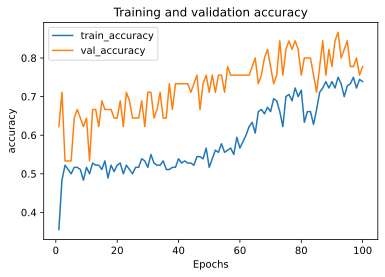

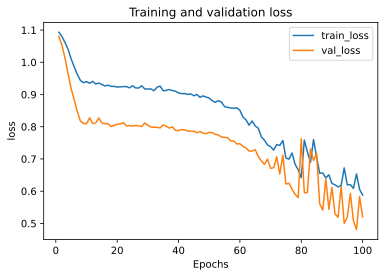

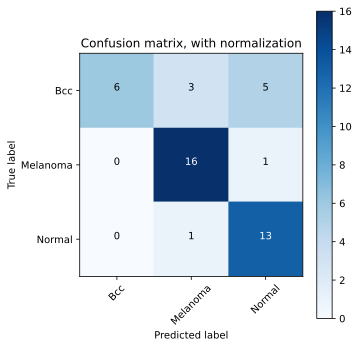

              precision    recall  f1-score   support

         Bcc       1.00      0.43      0.60        14
    Melanoma       0.80      0.94      0.86        17
      Normal       0.68      0.93      0.79        14

    accuracy                           0.78        45
   macro avg       0.83      0.77      0.75        45
weighted avg       0.83      0.78      0.76        45

Deep Neural Network
confusion matrix
[[[ 6. 16. 13.]
  [ 0.  4.  6.]]

 [[ 8.  1.  1.]
  [31. 24. 25.]]]
sensitivity is %f [0.43 0.94 0.93]
specificity is %f [1.   0.86 0.81]
accuracy is %f [0.82 0.89 0.84]


iterate kfold :  4  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 16) (45, 16)
Epoch 1/100
6/6 [==============================] - 1s 40ms/step - loss: 1.0954 - accuracy: 0.3833 - val_loss: 1.0836 - val_accuracy: 0.6222
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0822 - accuracy: 0.4722 - val_loss: 1.0712 - val_accuracy: 0.3778
Epoch 3/100

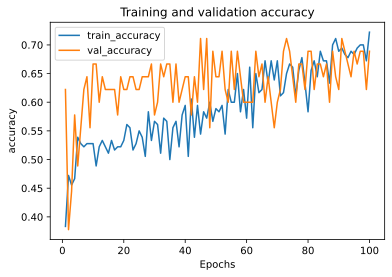

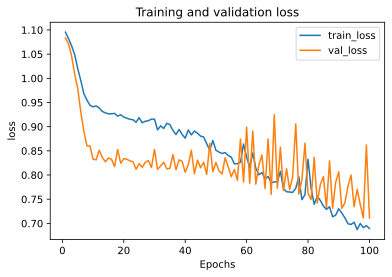

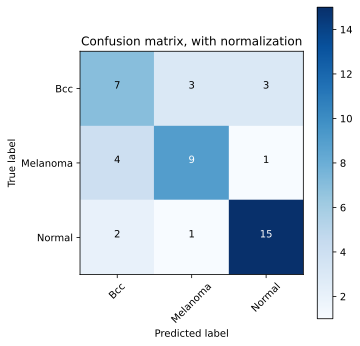

              precision    recall  f1-score   support

         Bcc       0.54      0.54      0.54        13
    Melanoma       0.69      0.64      0.67        14
      Normal       0.79      0.83      0.81        18

    accuracy                           0.69        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.69      0.69      0.69        45

Deep Neural Network
confusion matrix
[[[ 7.  9. 15.]
  [ 6.  4.  4.]]

 [[ 6.  5.  3.]
  [26. 27. 23.]]]
sensitivity is %f [0.54 0.64 0.83]
specificity is %f [0.81 0.87 0.85]
accuracy is %f [0.73 0.8  0.84]




Rata-Rata Akurasi
62.22% (+/- 11.93%)


In [19]:
from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for i, (train_index, val_index) in enumerate (kfold.split(X, Y)):
# for i, (train_index, val_index) in enumerate(kfold.split(X, Y.argmax(1))):
  print('iterate kfold : ',i,' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

  x_train_kf, x_val_kf = X[train_index], X[val_index]
  y_train_kf, y_val_kf = Y[train_index], Y[val_index]

  print(x_train_kf.shape, x_val_kf.shape)

  model =keras.Sequential()
  model.add(Dense(16, input_dim=16, activation='relu'))

  model.add(Dense(128, activation='relu'))

  

  model.add(Dense(128, activation='relu'))

  model.add(Dense(128, activation='relu'))



  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))



  model.add(Dense(3,activation="softmax"))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])
 
#   history= model.fit(X[train_index], Y[train_index], epochs=100)
  history= model.fit(X[train_index], Y[train_index], epochs=100, 
                     validation_data=(X[val_index],Y[val_index]))
  
	# evaluate the model

  scores = model.evaluate(X[val_index], Y[val_index], verbose=0)

  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  print("\n")

  print('result ============================================================================================')
  plot_metric(history, 'accuracy')
  plot_metric(history, 'loss')

  # predict test data
  # y_pred=model.predict(X[val_index])
  # y_pred1=model.predict(X[train_index])

  y_pred=model.predict(x_val_kf)
  y_pred1=model.predict(x_train_kf)




  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc', 'Melanoma', 'Normal'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

  print(classification_report(y_val_kf.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc',   'Melanoma', 'Normal']))
  print('Deep Neural Network')
  display_summary(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  print("\n")
  cvscores.append(scores[1] * 100)
print("\n")
print("Rata-Rata Akurasi")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




# save_model_path = "/drive/My Drive/Moddel/model_new2.h5"
# model.save(save_model_path,include_optimizer=False)

# save_model_path = "/drive/My Drive/Model/model_" + str(i) + ".h5"
# model.save(save_model_path,include_optimizer=False)